In [1]:
import pandas as pd 

df_s=pd.read_csv(r"G:\Sea Ice extent\seaice.csv") 
df_s

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [5]:
                                             #DATA CLEANING

df_s.columns = df_s.columns.str.strip()


df_s['Date'] = pd.to_datetime(df_s[['Year', 'Month', 'Day']])


df_s['Year'] = df_s['Date'].dt.year


df_s.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere,Date
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north,1978-10-26
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north,1978-10-28
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north,1978-10-30
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north,1978-11-01
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north,1978-11-03


In [7]:
df_s.isnull().sum()

Year           0
Month          0
Day            0
Extent         0
Missing        0
Source Data    0
hemisphere     0
Date           0
dtype: int64

In [9]:
df_s.drop(columns=['Source Data', 'Missing'],inplace=True)

In [11]:
df_s.head()

,Year,Month,Day,Extent,hemisphere,Date
0,1978,10,26,10.231,north,1978-10-26
1,1978,10,28,10.420,north,1978-10-28
2,1978,10,30,10.557,north,1978-10-30
3,1978,11,1,10.670,north,1978-11-01
4,1978,11,3,10.777,north,1978-11-03


In [13]:
df_s.dtypes

Year                   int32
Month                  int64
Day                    int64
Extent               float64
hemisphere            object
Date          datetime64[ns]
dtype: object

In [15]:
df_s.drop(columns=['Year','Month','Day'],inplace=True)

In [17]:
df_s.head()

,Extent,hemisphere,Date
0,10.231,north,1978-10-26
1,10.420,north,1978-10-28
2,10.557,north,1978-10-30
3,10.670,north,1978-11-01
4,10.777,north,1978-11-03


In [19]:
df_s.to_csv("df_s.csv", index=False)

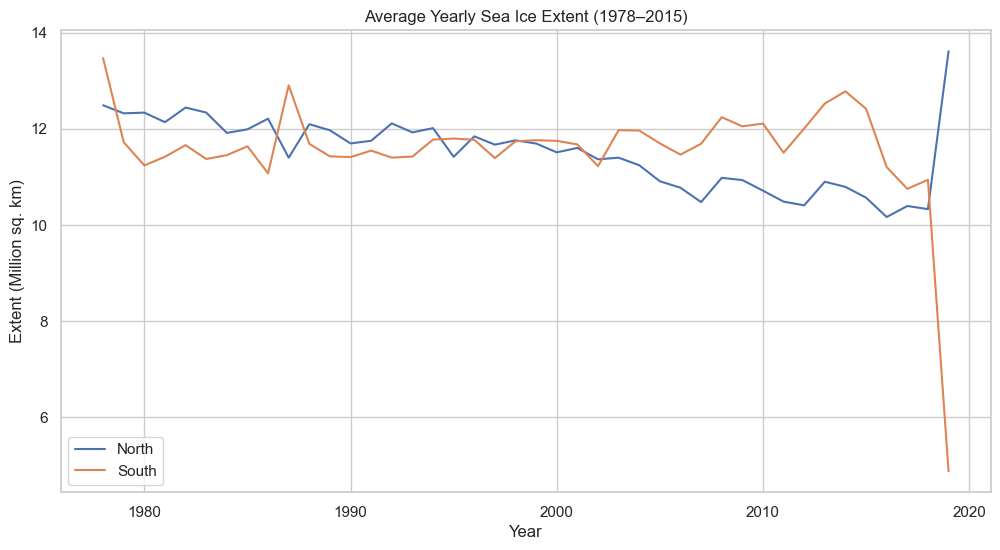

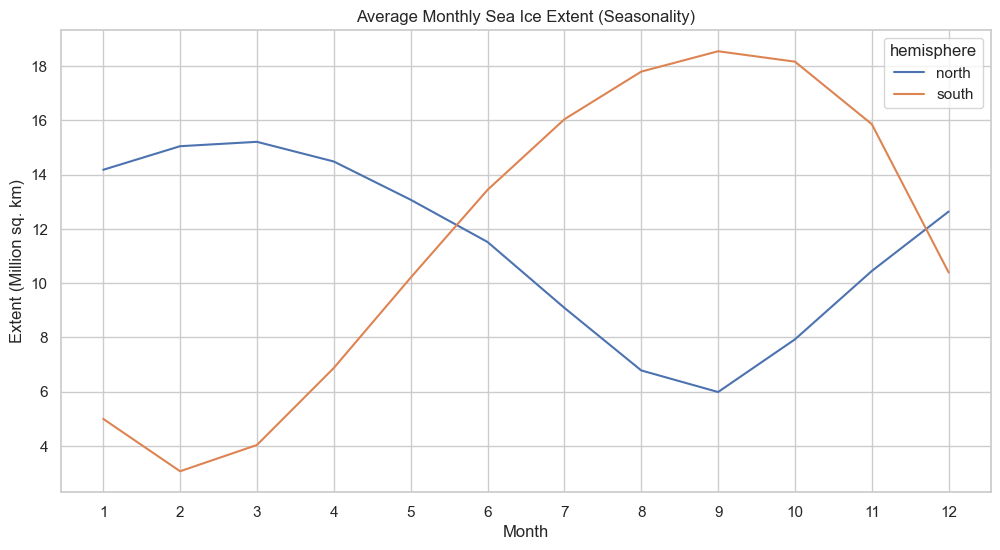

In [17]:
                                 # YEARLY AND MONTLY SEA ICE EXTENT


import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

df_s['Year'] = df_s['Date'].dt.year
yearly = df_s.groupby(['Year', 'hemisphere'])['Extent'].mean().reset_index()

plt.figure(figsize=(12, 6))
for hemi in yearly['hemisphere'].unique():
    subset = yearly[yearly['hemisphere'] == hemi]
    plt.plot(subset['Year'], subset['Extent'], label=hemi.capitalize())

plt.title('Average Yearly Sea Ice Extent (1978–2015)')
plt.xlabel('Year')
plt.ylabel('Extent (Million sq. km)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Monthly seasonality pattern
df_s['Month'] = df_s['Date'].dt.month
monthly_avg = df_s.groupby(['Month', 'hemisphere'])['Extent'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Extent', hue='hemisphere')
plt.title('Average Monthly Sea Ice Extent (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Extent (Million sq. km)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()
